In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import ndtri


Narišite histogram dohodkov vseh družin v Kibergradu. Pri tem dohodke razdelite v enako široke razrede.
Širino posameznega razreda določite v skladu s Freedman–Diaconisovim pravilom,
Kjer sta q1/4 in q3/4 prvi in tretji kvartil, n pa je število enot. To vrednost nato
smiselno zaokrožite na število oblike k · 10^r, kjer je k ∈ {1, 2, 5} in r ∈ Z."""

In [3]:
pot = "kibergrad.csv"
data = pd.read_csv(pot)
lastnosti = data.columns
#print(data.head())

dohodki = data.iloc[:,[3]] #stolpec dohodkov

n = dohodki.size #tevilo vrstic oz podatkov
q1 = dohodki.describe().loc['25%'][0] #1. kvartil

q3 = dohodki.describe().loc['75%'][0] #3. kvartil

zacetek = int(dohodki.describe().loc['min'][0]) #zacetek histograma
konec = int(dohodki.describe().loc['max'][0])

sirina = 2*(q3 - q1)/np.cbrt(n)
sirina = int(sirina//1000*1000)

mu = dohodki.describe().loc["mean"][0]
std = dohodki.describe().loc["std"][0] 

zacetek = (zacetek // sirina) * sirina #da se zacnejo na celo "lepo" stevilo
konec = (konec // sirina + 1) * sirina

k = 0
y = []
while (k< (konec - zacetek)//sirina ): #st intervalov dolzine sirina
    a= int(dohodki[(dohodki >= zacetek+ k*sirina) & ( dohodki < zacetek + (k+1)*sirina )].count())
    y.append(a)
    k = k + 1

x = np.linspace(zacetek, konec, (konec - zacetek)//sirina+1)


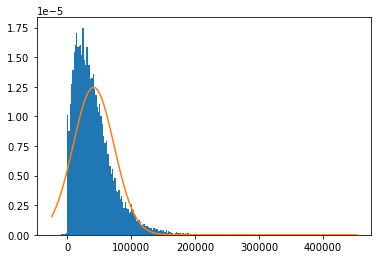

In [4]:
dohodki_np = dohodki.to_numpy()
#normirano
plt.figure()
plt.hist(dohodki_np, bins=((konec - zacetek)//sirina ), range=(zacetek, konec), density=True)
plt.plot(x, stats.norm.pdf(x, mu, std))
plt.show()

"""
Narišite kumulativno porazdelitveno funkcijo porazdelitve dohodkov družin v
Kibergradu in primerjajte s kumulativno porazdelitveno funkcijo ustrezne normalne porazdelitve.
"""

In [5]:
komulativno = np.cumsum(y)

X = []
for i in range(x.size-1):
    sredina = (x[i+1] + x[i])/2
    X.append(sredina)

y_cdf = stats.norm.cdf(X, mu, std)

komulativno = komulativno/komulativno[-1] #normiramo podatke 

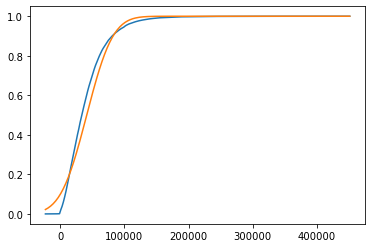

In [6]:
plt.figure()   
plt.plot(X, komulativno)
plt.plot(X, y_cdf)
plt.show()

"""
d) Narišite še primerjalni kvantilni (Q–Q) grafikon, ki porazdelitev dohodkov
družin v Kibergradu primerja z normalno porazdelitvijo (
"""

In [7]:
dohodki_np = np.hstack(dohodki_np)
urejen = np.sort(dohodki_np, axis=None ) #uredimo array 

#normalno porazdelitev razdelimo na n+1 delov. 

delcki = np.arange(1,n+1)/(n+1) #range ne vkluci zadnjega

#izracunamo teoreticne vrednosti porazdelitve
teoreticne_vrednosti = ndtri(delcki)


#normaliziramo nase vrednosti
norm_podatki = (urejen - mu)/std


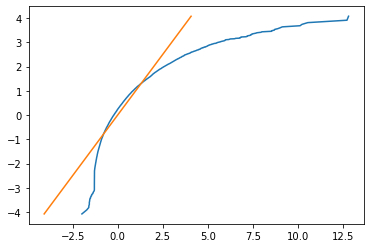

In [8]:
#narisemo graf 
plt.figure()
plt.plot(norm_podatki, teoreticne_vrednosti) #scatter da v tocke
plt.plot(teoreticne_vrednosti, teoreticne_vrednosti) #primerjava z normalno porazdelitvijo
plt.show()

"""
Vzemite 1000 enostavnih slučajnih vzorcev velikosti 400 in narišite histogram
vzorčnih povprečij dohodkov družin.
"""

In [9]:
vzorci_povprecja = []
var = [] #potrebujemo za f primer
m = 1000 #st vzorcev
for i in range(m):
    vzorec = dohodki.sample(n=400)
    vzorec_mean = vzorec.describe().loc['mean'][0] #povprecje vzorca
    vzorci_povprecja.append(vzorec_mean)
    #vzorec_var = np.std(vzorec, ddof=1) #deljeno z n-1
    #var.append(np.square(vzorec_var))

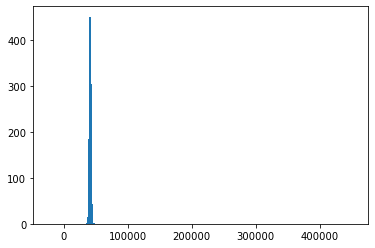

In [10]:
plt.figure()
plt.hist(vzorci_povprecja, bins=((konec - zacetek)//sirina ), range=(zacetek, konec))
plt.show()


In [11]:
vzorci_povprecja[0:5]
print(min(vzorci_povprecja))
print(max(vzorci_povprecja))

nov_zacetek = min(vzorci_povprecja)//sirina*sirina
nov_konec = (max(vzorci_povprecja)//sirina+1)*sirina


35633.0925
47335.6


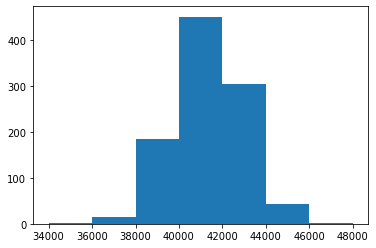

In [12]:
#Ker so razredi zelo skupaj si prilagodimo x os
plt.figure()
plt.hist(vzorci_povprecja, bins=(int((nov_konec - nov_zacetek)//sirina) ), range=(nov_zacetek, nov_konec))
plt.show()


"""f) Dorišite normalno gostoto, katere pričakovana vrednost se ujema s povprečnim
dohodkom na družino v Kibergradu, standardni odklon pa s standardno napako
za enostavni slučajni vzorec velikosti 400. Komentirajte, kako dobro se prilega."""

In [13]:
#standardna napake je standardni odklon povprečij. Torej kako so porazdeljena povprečja
povprecje_vzorcev = np.sum(vzorci_povprecja)/m #ker so ravno enake velikosti
#SE = np.sqrt(np.sum(var)/n)
S = np.std(vzorci_povprecja, ddof=1)/np.sqrt(1000)
sigma = np.std(vzorci_povprecja, ddof=1)
S

50.58825419940912

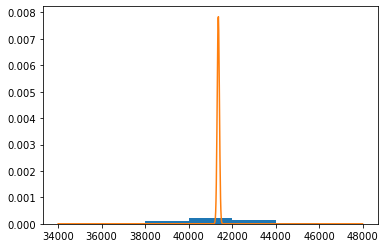

In [14]:
x = np.linspace(nov_zacetek, nov_konec, m) #namesto velikega st int((nov_konec - nov_zacetek)//sirina+1) za enako stevilo intervalov
plt.figure()
plt.hist(vzorci_povprecja, bins=(int((nov_konec - nov_zacetek)//sirina) ), range=(nov_zacetek, nov_konec), density=True) #normirana
plt.plot(x, stats.norm.pdf(x, povprecje_vzorcev, S))
plt.show()


Vidimo, da so povprečja zelo ozko porazdeljena kar je pričakovano.


Za vzorčna povprečja podobno kot prej narišite še kumulativno porazdelitveno
funkcijo in primerjalni kvantilni grafikon ter primerjajte z normalno porazdelitvijo. Komentirajte prileganje.



In [15]:

#res = stats.cumfreq(vzorci_povprecja, numbins=8)
#x = np.linspace(nov_zacetek, nov_konec,8)

#fig = plt.figure(figsize=(10, 4))
#ax1 = fig.add_subplot(1, 2, 1)
#ax1.hist(vzorci_povprecja, bins=x, range=(nov_zacetek, nov_konec))

#ax2 = fig.add_subplot(1, 2, 2)
#ax2.bar(x, res.cumcount, width=10, color="blue")
#plt.show()
y = stats.cumfreq(vzorci_povprecja, numbins=(int((nov_konec - nov_zacetek)//sirina)), defaultreallimits=(nov_zacetek, nov_konec))
len(y[0])
x = np.linspace(nov_zacetek + 1000, nov_konec - 1000, int((nov_konec - nov_zacetek)//sirina))
len(x)

7

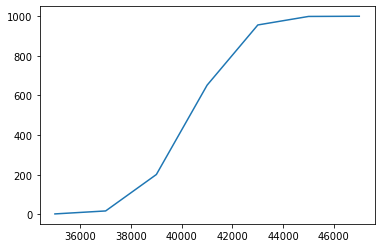

In [16]:
x = np.linspace(nov_zacetek, nov_konec, int((nov_konec - nov_zacetek)//sirina+1))
y = stats.cumfreq(vzorci_povprecja, numbins=(int((nov_konec - nov_zacetek)//sirina)), defaultreallimits=(nov_zacetek, nov_konec))
x = np.linspace(nov_zacetek + 1000, nov_konec - 1000, int((nov_konec - nov_zacetek)//sirina))
plt.figure()
komulativno = y[0]
plt.plot(x,komulativno)

plt.show()


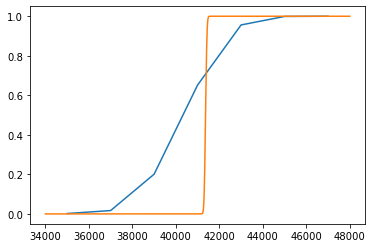

In [17]:

kom_norm = komulativno/komulativno[-1] #normirana komulativna porazdelitev
X = np.linspace(nov_zacetek, nov_konec, m)
y_cdf = stats.norm.cdf(X, povprecje_vzorcev, S)

plt.figure()
plt.plot(x, kom_norm)
plt.plot(X, y_cdf)
plt.show()

q-q grafikon


In [18]:
urejeno = np.sort(vzorci_povprecja) #uredimo po vrsti

#normalno porazdelitev razdelimo na n+1 delov. 
delcki = np.arange(1,m+1)/(m+1) #range ne vkluci zadnjega

#izracunamo teoreticne vrednosti porazdelitve
teoreticne_vrednosti = ndtri(delcki)


#normaliziramo nase vrednosti
norm_podatki = (urejeno - povprecje_vzorcev)/S


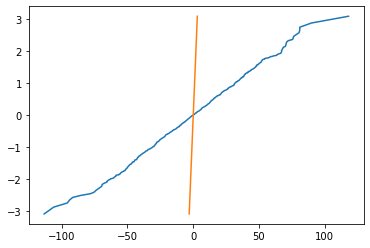

In [19]:
#narisemo graf 
plt.figure()
plt.plot(norm_podatki, teoreticne_vrednosti) #scatter da v tocke
plt.plot(teoreticne_vrednosti, teoreticne_vrednosti) #primerjava z normalno porazdelitvijo
plt.show()

Povprečja o sicer porazdeljena normalno, ampak z neko drugo normalno porazdelitvijo kar je pričakovano, saj smo za parameter sigma uporbili standardno napako in ne cenilke za standardni odklon vzorčnega povprečja. 

Primerjajmo porazdelitev vzorčnih povprečij z normalno porazdelitvijo ki ima za standardni odklon nepristransko cenilko za standardni odklon. 

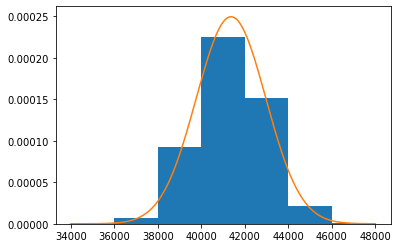

In [20]:
x = np.linspace(nov_zacetek, nov_konec, m) #namesto velikega st int((nov_konec - nov_zacetek)//sirina+1) za enako stevilo intervalov
plt.figure()
plt.hist(vzorci_povprecja, bins=(int((nov_konec - nov_zacetek)//sirina) ), range=(nov_zacetek, nov_konec), density=True) #normirana
plt.plot(x, stats.norm.pdf(x, povprecje_vzorcev, sigma))
plt.show()

Normalna porazdelitev se zelo prilega vzorčnim povprečjem.

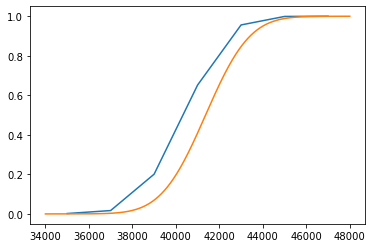

In [22]:
x = np.linspace(nov_zacetek + 1000, nov_konec - 1000, int((nov_konec - nov_zacetek)//sirina))
kom_norm = komulativno/komulativno[-1] #normirana komulativna porazdelitev
X = np.linspace(nov_zacetek, nov_konec, m)
y_cdf = stats.norm.cdf(X, povprecje_vzorcev, sigma)

plt.figure()
plt.plot(x, kom_norm)
plt.plot(X, y_cdf)
plt.show()

In [24]:
urejeno = np.sort(vzorci_povprecja) #uredimo po vrsti

#normalno porazdelitev razdelimo na n+1 delov. 
delcki = np.arange(1,m+1)/(m+1) #range ne vkluci zadnjega

#izracunamo teoreticne vrednosti porazdelitve
teoreticne_vrednosti = ndtri(delcki)


#normaliziramo nase vrednosti
norm_podatki = (urejeno - povprecje_vzorcev)/sigma

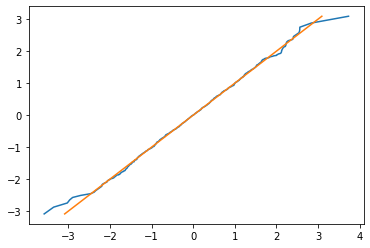

In [25]:
#narisemo graf 
plt.figure()
plt.plot(norm_podatki, teoreticne_vrednosti) #scatter da v tocke
plt.plot(teoreticne_vrednosti, teoreticne_vrednosti) #primerjava z normalno porazdelitvijo
plt.show()

Podatki se skoraj popolnoma ujemajo z normalno porazdelitvijo. 